#  데이터 세트 분리
### 훈련세트
### 테스트 세트
보통 80:20 으로 구성

In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("LinearRegressionData.csv")

In [3]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# 훈련 80%, 테스트 20% 로 분리 / random_state는 실무에서는 잘 사용되어 지지 않음. 원래는 훈련 세트에서 랜덤으로 추출하여 생성

In [6]:
X, len(X) # 전체 데이터 X, 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [7]:
X_train, len(X_train) # 훈련 세트 X, 개수 # random_state의 값을 바꾸게 되면 값이 달라짐

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [8]:
X_test, len(X_test) # 테스트 세트 X, 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [9]:
y, len(y) # 전체 데이터 y, 개수

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [10]:
y_train, len(y_train) # 훈련 세트 y, 개수

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [11]:
y_test, len(y_test) # 테스트 세트 y, 개수

(array([ 90,   8, 100,  38], dtype=int64), 4)

### 분리된 데이터를 통한 모델링

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [13]:
reg.fit(X_train, y_train) # 훈련 세트로 학습

LinearRegression()

### 데이터 시각화 (훈련 세트)

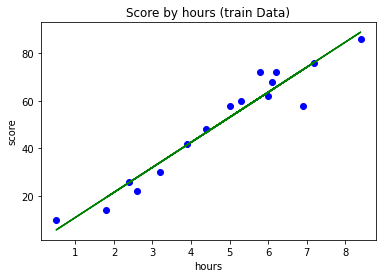

In [14]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by hours (train Data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (테스트 세트)

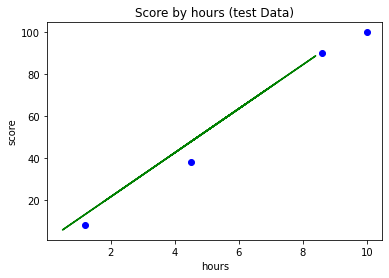

In [15]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green') # 검증을 해야하기 때문에 train data로 확인
plt.title('Score by hours (test Data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [16]:
reg.coef_ # 기울기 (m)

array([10.49161294])

In [17]:
reg.intercept_ # y 절편 (b)

0.6115562905169796

### 모델 평가

In [18]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가
# 0 ~ 1까지 나오며 1에 가까울 수록 높은 점수

0.9727616474310156

In [19]:
reg.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9356663661221668

## 경사 하강법 (Gradient Descent)

max_iter : 훈련 세트 반복 횟수 (Epoch 횟수)  
eta0 : 학습률 (learning rate)  

지수 표기법  
$1e-3 = 0.001 (10^{-3})$  
$1e-4 = 0.0001 (10^{-4})$   
$le+3 = 1000 (10^3)$  
$1e+4 = 10000 (10^4)$

In [45]:
from sklearn.linear_model import SGDRegressor # SGD : Stochastic Gradient Descent : 확률적 경사 하강법
#sr = SGDRegressor(max_iter=1000, eta0=0.001, random_state=0, verbose=1)
# 반복회수, 학습률, (결과를 통일하기 위한 옵션), 훈련세트를 반복하면서 손실이 어떻게 줄어드는지 확인

#sr = SGDRegressor(max_iter=500, eta0=1e-4, random_state=0, verbose=1) # 지수 표기법
sr = SGDRegressor()
sr.fit(X_train, y_train)

SGDRegressor()

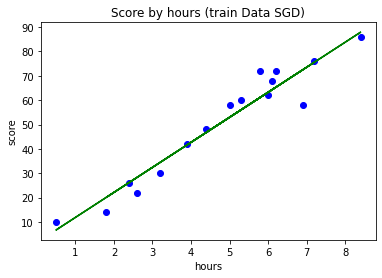

In [46]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green') # 검증을 해야하기 때문에 train data로 확인
plt.title('Score by hours (train Data SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [27]:
# 훈련 데이터의 평가 점수와 비교해야한다.
sr.coef_, sr.intercept_ # 기울기(array([10.49161294]))와 절편(0.6115562905169796) 비교

(array([10.28351676]), array([1.64335254]))

In [30]:
sr.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9728611834634359

In [32]:
sr.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

# 보통은 좋은 모델이면 훈련 세트의 점수가 더 높게 나온다.

0.9352939952890701